In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")
df.head()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   11109 non-null  int64  
 1   name                                      11108 non-null  object 
 2   lang                                      11109 non-null  object 
 3   bot                                       11109 non-null  int64  
 4   created_at                                11109 non-null  object 
 5   statuses_count                            11109 non-null  int64  
 6   account_age_in_days                       11109 non-null  int64  
 7   number_of_tweets                          11109 non-null  int64  
 8   account_average_tweets_per_day            11109 non-null  float64
 9   avg_tweets_per_actual_day                 11109 non-null  float64
 10  day_with_most_tweets              

# Pre-processing 

Dropping features not considered interesting

In [3]:
features_to_drop = [
    "user_id",
    "name",
    "created_at",
    "day_with_most_tweets",
]

df.drop(features_to_drop, axis=1, inplace=True)

## One hot encoding

One hot only for lang

In [4]:
df = pd.get_dummies(df, columns=["lang"])
df.head()

,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweets_in_a_day,entropy_for_day,entropy_for_hour,entropy_for_minute,...,lang_ko,lang_nl,lang_pl,lang_pt,lang_ru,lang_sv,lang_tr,lang_xx-lc,lang_zh-CN,lang_zh-TW
0,1,76,1314,126,0.057839,4.666667,18,2.903992,2.762944,1.867539,...,0,0,0,0,0,0,0,0,0,0
1,0,54,1311,116,0.041190,4.640000,17,2.942683,2.881816,1.909614,...,0,0,0,0,0,0,0,0,0,0
2,1,3,2709,4,0.001107,2.000000,3,1.000000,0.918296,0.918296,...,0,0,0,0,0,0,0,0,0,0
3,1,50,2080,1358,0.024038,8.035503,143,3.543607,1.320785,0.474758,...,0,0,0,0,0,0,0,0,0,0
4,0,7085,1198,3434,5.914023,28.380165,50,4.253096,1.705484,0.510899,...,0,0,0,0,0,0,0,0,0,0


## Training and test set creations

In [5]:
bot_series = df.pop("bot")

In [6]:
train_set, test_set, train_label, test_label = train_test_split(df, bot_series, stratify=bot_series, test_size=0.30)

# Decision Tree

In [41]:
dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth= 10, min_samples_split=3, min_samples_leaf=8)
dt = dt.fit(train_set, train_label)

In [42]:
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

## Evaluation metrics

In [43]:
print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.8533950617283951
Accuracy test set  0.8367836783678367
Precision train set  0.8725466620079293
Recall train set  0.8533950617283951
F1 score train set  0.849285618231994
Support train set  (array([0.96014068, 0.80103508]), array([0.70300429, 0.97617379]), array([0.81169475, 0.87997473]), array([3495, 4281]))


/home/bendico765/Scrivania/Università/DM/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


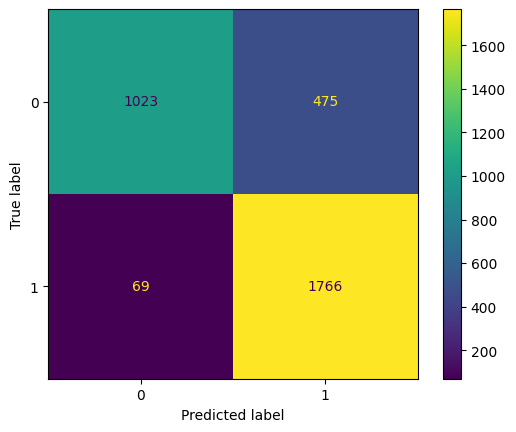

In [44]:
metrics.plot_confusion_matrix(dt, test_set, test_label)
plt.show() 